In [1]:
# pip install --upgrade efficientnet-pytorch

In [2]:
from fastai.vision import *
from efficientnet_pytorch import EfficientNet

import warnings
warnings.filterwarnings("ignore")

In [3]:
model = EfficientNet.from_pretrained('efficientnet-b3')

Loaded pretrained weights for efficientnet-b3


In [4]:
model._fc = nn.Linear(1536, 3)

In [5]:
data_path = Path('./chest_xray').absolute()
model_path = Path('./model').absolute()

In [6]:
data = ImageDataBunch.from_folder(data_path,
                                  valid = 'test',
                                  size=299,
                                  ds_tfms=get_transforms()
                                 ).normalize(imagenet_stats)

In [7]:
print(data.classes, len(data.train_ds), len(data.valid_ds))

['BACTERIA', 'NORMAL', 'VIRUS'] 5232 624


In [8]:
learn = Learner(data, 
                model,
                bn_wd=False,
                metrics=error_rate,
                loss_func=LabelSmoothingCrossEntropy()
               ).to_fp16()

learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,0.698107,1.337726,0.415064,01:00
1,0.675375,1.954547,0.592949,00:59
2,0.645655,0.790677,0.221154,00:59
3,0.606404,0.853984,0.261218,01:00
4,0.563695,0.613456,0.150641,01:00


In [9]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


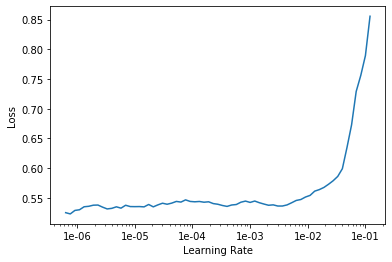

In [10]:
learn.recorder.plot()

In [11]:
learn.fit_one_cycle(5, max_lr=5e-3)

epoch,train_loss,valid_loss,error_rate,time
0,0.602468,0.743860,0.241987,01:00
1,0.670540,6.051249,0.564103,01:00
2,0.642411,1.607756,0.373397,01:00
3,0.602321,0.688846,0.136218,01:00
4,0.568432,0.552352,0.112179,01:00
